In [1]:
import torch
import torch.nn.functional as F
import math
import numpy as np
import argparse
from torchvision import datasets, transforms
import random
import copy
import torch.nn as nn
import sys
from torch.utils.data import random_split

In [2]:
train_size = 4000
test_size = 5000
d = 784
device = torch.device("cpu")

In [3]:
transform=transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize((0.1307,), (0.3081,))
        ])
trainset = datasets.MNIST('MNIST', train=True, download=True,
                    transform=transform)
testset = datasets.MNIST('MNIST', train=False,
                    transform=transform)
trainset = random_split(trainset, [train_size, trainset.data.shape[0] - train_size],generator=torch.Generator().manual_seed(7))[0]
testset = random_split(testset, [test_size, testset.data.shape[0] - test_size],generator=torch.Generator().manual_seed(7))[0]

train_loader = torch.utils.data.DataLoader(
    trainset,
    batch_size=128, shuffle= False)

test_loader = torch.utils.data.DataLoader(
    testset,
    batch_size=test_size, shuffle= False)

100.0%


Extracting MNIST/MNIST/raw/train-images-idx3-ubyte.gz to MNIST/MNIST/raw


100.0%


Extracting MNIST/MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/MNIST/raw




100.0%


Extracting MNIST/MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/MNIST/raw



100.0%


Extracting MNIST/MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/MNIST/raw



In [4]:
class FCN(torch.nn.Module):
  def __init__(self,width):
    super(FCN, self).__init__()
    self.fc1 = nn.Linear(d,width,bias = False)
    self.fc2 = nn.Linear(width,10,bias = False)
    self.width = width
  def forward(self, x):
    x = x.view(-1,d)
    x = self.fc1(x)
    x = F.relu(x)
    x = self.fc2(x)
    return x

In [5]:
class AverageMeter(object):
    """Computes and stores the average and current value"""
    def __init__(self):
        self.reset()

    def reset(self):
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, n=1):
        self.val = val
        self.sum += val * n
        self.count += n
        self.avg = self.sum / self.count

In [8]:
model = FCN(100).to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)
epochs = 20
th = 1e-3

In [9]:
for epoch in range(epochs):
    correct = 0
    train_loss = AverageMeter()
    for (data,target) in train_loader:
        data, target = data.to(device), target.to(device)
        one_hot = nn.functional.one_hot(target,10).float()
        optimizer.zero_grad()
        output = model(data)
        loss = F.mse_loss(output,one_hot)
        pred = output.argmax(dim=1, keepdim=True)
        correct += pred.eq(target.view_as(pred)).sum()
        train_loss.update(loss.item(),len(data))
        loss.backward()
        optimizer.step()
#        print(f'epoch:{epoch}, training loss: {loss.item()}')
    accuracy = correct/train_size
    print(f'epoch:{epoch},  training accuracy:{accuracy}')
    if train_loss.avg<th:
        break

with torch.no_grad():
    for (data_test,target_test) in test_loader:
        data_test, target_test = data_test.to(device), target_test.to(device)
        one_hot_test = nn.functional.one_hot(target_test,10).float()
        output_test = model(data_test)
        test_loss = F.mse_loss(output_test,one_hot_test)
        pred = output_test.argmax(dim=1, keepdim=True)
        correct = pred.eq(target_test.view_as(pred)).sum()
        accuracy = correct/test_size

epoch:0,  training accuracy:0.5475000143051147
epoch:1,  training accuracy:0.7649999856948853
epoch:2,  training accuracy:0.8230000138282776
epoch:3,  training accuracy:0.8492500185966492
epoch:4,  training accuracy:0.8657500147819519
epoch:5,  training accuracy:0.8812500238418579
epoch:6,  training accuracy:0.8899999856948853
epoch:7,  training accuracy:0.8957499861717224
epoch:8,  training accuracy:0.9022499918937683
epoch:9,  training accuracy:0.90625
epoch:10,  training accuracy:0.9102500081062317
epoch:11,  training accuracy:0.9139999747276306
epoch:12,  training accuracy:0.9160000085830688
epoch:13,  training accuracy:0.9210000038146973
epoch:14,  training accuracy:0.925000011920929
epoch:15,  training accuracy:0.9262499809265137
epoch:16,  training accuracy:0.9300000071525574
epoch:17,  training accuracy:0.9325000047683716
epoch:18,  training accuracy:0.934249997138977
epoch:19,  training accuracy:0.9359999895095825


In [10]:
from data_nn_dd import training,testing

ModuleNotFoundError: No module named 'data_nn_dd'

In [11]:
widths = training[1::8]
train_loss = training[5::8]
train_error = 1 - np.array(training[7::8])
test_loss = testing[5::8]
test_error = 1 - np.array(testing[7::8])



NameError: name 'training' is not defined

In [4]:
import matplotlib.pyplot as plt


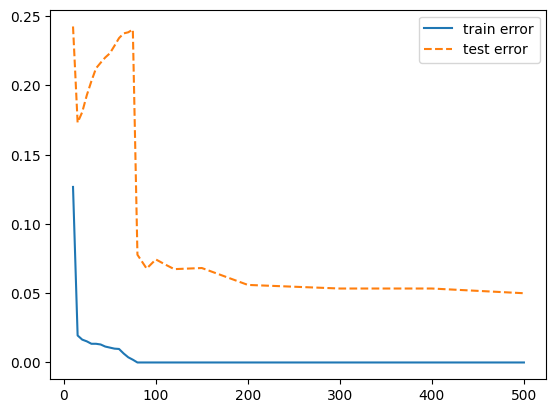

In [5]:
plt.plot(widths,train_error,linestyle='-',label = 'train error')
plt.plot(widths,test_error,linestyle='--',label = 'test error')
plt.legend()

plt.show()